# MINI PROJECT: DID COVID-19 INFLUENCE THE 2020 US ELECTIONS?
By conducting data extraction, curation and cleaning to data from The Covid Tracking Project APIs as well as data from the 2020 US Elections, our team plotted relevant figures to visualise data correlations and used a Random Forest Classifier to predict whether a state is Democrat or Republican based on Covid-19 data.   


In [5]:
#Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sb
# sb.set() # set the default Seaborn style for graphics

In [6]:
# Passing cleaned data into dataframes 

data = pd.read_csv("all-states-history.csv")
popdf = pd.read_csv("state_population.csv")
affdf = pd.read_csv("party_affiliation.csv")

In [7]:
#Setting headers to determine relevant columns

required_cols = ["date", "state", "deathIncrease", "hospitalizedCumulative", "hospitalizedCurrently", "totalTestResultsIncrease", "recovered", "positive"]
df = data[required_cols]

In [8]:
#Merging the three dataframes into one

df = pd.merge(df, popdf, on="state")
df = pd.merge(df, affdf, on="state")

In [5]:
df

,date,state,deathIncrease,hospitalizedCumulative,hospitalizedCurrently,totalTestResultsIncrease,recovered,positive,pop,p_democrat,p_republican,is_democrat
0,2021-03-07,AK,0,1293.0,33.0,0,NaN,56886.0,2687341,0.427720,0.528331,False
1,2021-03-06,AK,0,1293.0,33.0,0,NaN,56886.0,2687341,0.427720,0.528331,False
2,2021-03-05,AK,2,1293.0,33.0,7144,NaN,56886.0,2687341,0.427720,0.528331,False
3,2021-03-04,AK,0,1290.0,32.0,13466,NaN,56745.0,2687341,0.427720,0.528331,False
4,2021-03-03,AK,1,1285.0,26.0,6358,NaN,56605.0,2687341,0.427720,0.528331,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18622,2020-03-05,WY,0,NaN,NaN,4,NaN,NaN,2133993,0.263879,0.694998,False
18623,2020-03-04,WY,0,NaN,NaN,3,NaN,NaN,2133993,0.263879,0.694998,False
18624,2020-03-03,WY,0,NaN,NaN,0,NaN,NaN,2133993,0.263879,0.694998,False
18625,2020-03-02,WY,0,NaN,NaN,0,NaN,NaN,2133993,0.263879,0.694998,False


In [13]:
#Filtering through to remove empty rows

print(f"old length: {len(df)}")
new_df = df.dropna().copy()
print(f"new length: {len(new_df)}")

old length: 18627
new length: 7654


In [7]:
new_df

,date,state,deathIncrease,hospitalizedCumulative,hospitalizedCurrently,totalTestResultsIncrease,recovered,positive,pop,p_democrat,p_republican,is_democrat
111,2020-11-16,AK,0,559.0,143.0,4965,7165.0,23240.0,2687341,0.427720,0.528331,False
112,2020-11-15,AK,0,550.0,141.0,5118,7164.0,22662.0,2687341,0.427720,0.528331,False
113,2020-11-14,AK,2,543.0,125.0,17598,7162.0,22020.0,2687341,0.427720,0.528331,False
114,2020-11-13,AK,0,542.0,113.0,0,7161.0,21286.0,2687341,0.427720,0.528331,False
115,2020-11-12,AK,0,537.0,113.0,10076,7161.0,20702.0,2687341,0.427720,0.528331,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18576,2020-04-20,WY,0,51.0,19.0,299,233.0,428.0,2133993,0.263879,0.694998,False
18577,2020-04-19,WY,0,50.0,19.0,83,227.0,426.0,2133993,0.263879,0.694998,False
18578,2020-04-18,WY,0,50.0,19.0,99,206.0,422.0,2133993,0.263879,0.694998,False
18579,2020-04-17,WY,0,43.0,19.0,296,148.0,412.0,2133993,0.263879,0.694998,False


In [17]:
#Arithmetic manipulation of column values

new_df['spread1'] = new_df['hospitalizedCurrently'] / new_df['pop']
new_df['spread2'] = new_df['deathIncrease'] / new_df['pop']
new_df['healthcare1'] = (new_df['hospitalizedCumulative'] - new_df['hospitalizedCurrently']) / new_df['hospitalizedCumulative']
new_df['healthcare2'] = new_df['recovered'] / new_df['positive']
new_df['testing'] = new_df['totalTestResultsIncrease']
new_df['efforts'] = (new_df['healthcare1'] + new_df['healthcare2'] + new_df['testing']) /(new_df['spread1'] + new_df['spread2'])
new_df

,date,state,deathIncrease,hospitalizedCumulative,hospitalizedCurrently,totalTestResultsIncrease,recovered,positive,pop,p_democrat,p_republican,is_democrat,spread1,spread2,healthcare1,healthcare2,testing,efforts
111,2020-11-16,AK,0,559.0,143.0,4965,7165.0,23240.0,2687341,0.427720,0.528331,False,0.000053,0.000000e+00,0.744186,0.308305,4965,9.332501e+07
112,2020-11-15,AK,0,550.0,141.0,5118,7164.0,22662.0,2687341,0.427720,0.528331,False,0.000052,0.000000e+00,0.743636,0.316124,5118,9.756496e+07
113,2020-11-14,AK,2,543.0,125.0,17598,7162.0,22020.0,2687341,0.427720,0.528331,False,0.000047,7.442301e-07,0.769797,0.325250,17598,3.723998e+08
114,2020-11-13,AK,0,542.0,113.0,0,7161.0,21286.0,2687341,0.427720,0.528331,False,0.000042,0.000000e+00,0.791513,0.336418,0,2.682421e+04
115,2020-11-12,AK,0,537.0,113.0,10076,7161.0,20702.0,2687341,0.427720,0.528331,False,0.000042,0.000000e+00,0.789572,0.345909,10076,2.396522e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18576,2020-04-20,WY,0,51.0,19.0,299,233.0,428.0,2133993,0.263879,0.694998,False,0.000009,0.000000e+00,0.627451,0.544393,299,3.371393e+07
18577,2020-04-19,WY,0,50.0,19.0,83,227.0,426.0,2133993,0.263879,0.694998,False,0.000009,0.000000e+00,0.620000,0.532864,83,9.451664e+06
18578,2020-04-18,WY,0,50.0,19.0,99,206.0,422.0,2133993,0.263879,0.694998,False,0.000009,0.000000e+00,0.620000,0.488152,99,1.124369e+07
18579,2020-04-17,WY,0,43.0,19.0,296,148.0,412.0,2133993,0.263879,0.694998,False,0.000009,0.000000e+00,0.558140,0.359223,296,3.334840e+07


# Data Visualisation 
Using figures to make better sense of our results 

False    4948
True     2706
Name: is_democrat, dtype: int64


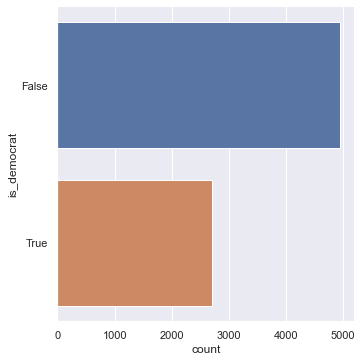

In [18]:
#Distribution of Election Results (All Results)

print(new_df["is_democrat"].value_counts())
sb.catplot(y = "is_democrat", data = new_df, kind = "count")

False    18
True     11
Name: is_democrat, dtype: int64


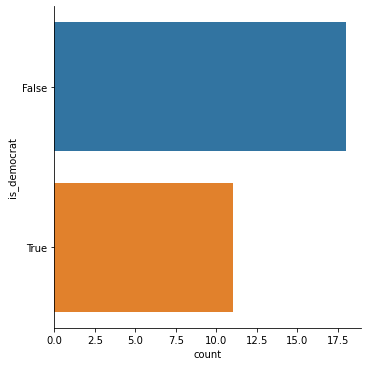

In [10]:
#Distribution of Election Results (One per state)

unique_df = new_df.drop_duplicates(subset = 'state')
print(unique_df["is_democrat"].value_counts())
sb.catplot(y = "is_democrat", data = unique_df, kind = "count")

In [20]:
# Extract the indicators of spread/healthcare/testing
numeric_data = pd.DataFrame(new_df[["spread1", "spread2", "healthcare1", "healthcare2", "testing", "p_democrat"]])

# Summary Statistics for all variables rounded to 6 dp
numeric_data.describe().round(6)

,spread1,spread2,healthcare1,healthcare2,testing,p_democrat
count,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000
mean,0.000038,0.000001,0.862504,0.633624,12255.314084,0.437248
std,0.000033,0.000002,0.135360,0.258264,16840.097957,0.106521
min,0.000000,-0.000016,-1.494297,0.024671,-130545.000000,0.263879
25%,0.000012,0.000000,0.820826,0.444096,2481.500000,0.356053
50%,0.000026,0.000000,0.897128,0.714529,6560.500000,0.405494
75%,0.000055,0.000001,0.945702,0.847552,14597.500000,0.525256
max,0.000174,0.000040,0.996187,0.979810,168192.000000,0.654558


              spread1   spread2  healthcare1  healthcare2   testing  \
spread1      1.000000  0.530466    -0.060203    -0.069645  0.157648   
spread2      0.530466  1.000000     0.040802     0.027402  0.098550   
healthcare1 -0.060203  0.040802     1.000000     0.239366  0.181313   
healthcare2 -0.069645  0.027402     0.239366     1.000000  0.016539   
testing      0.157648  0.098550     0.181313     0.016539  1.000000   
p_democrat  -0.158299 -0.061636     0.128992    -0.324481  0.377680   

             p_democrat  
spread1       -0.158299  
spread2       -0.061636  
healthcare1    0.128992  
healthcare2   -0.324481  
testing        0.377680  
p_democrat     1.000000  


<AxesSubplot:>

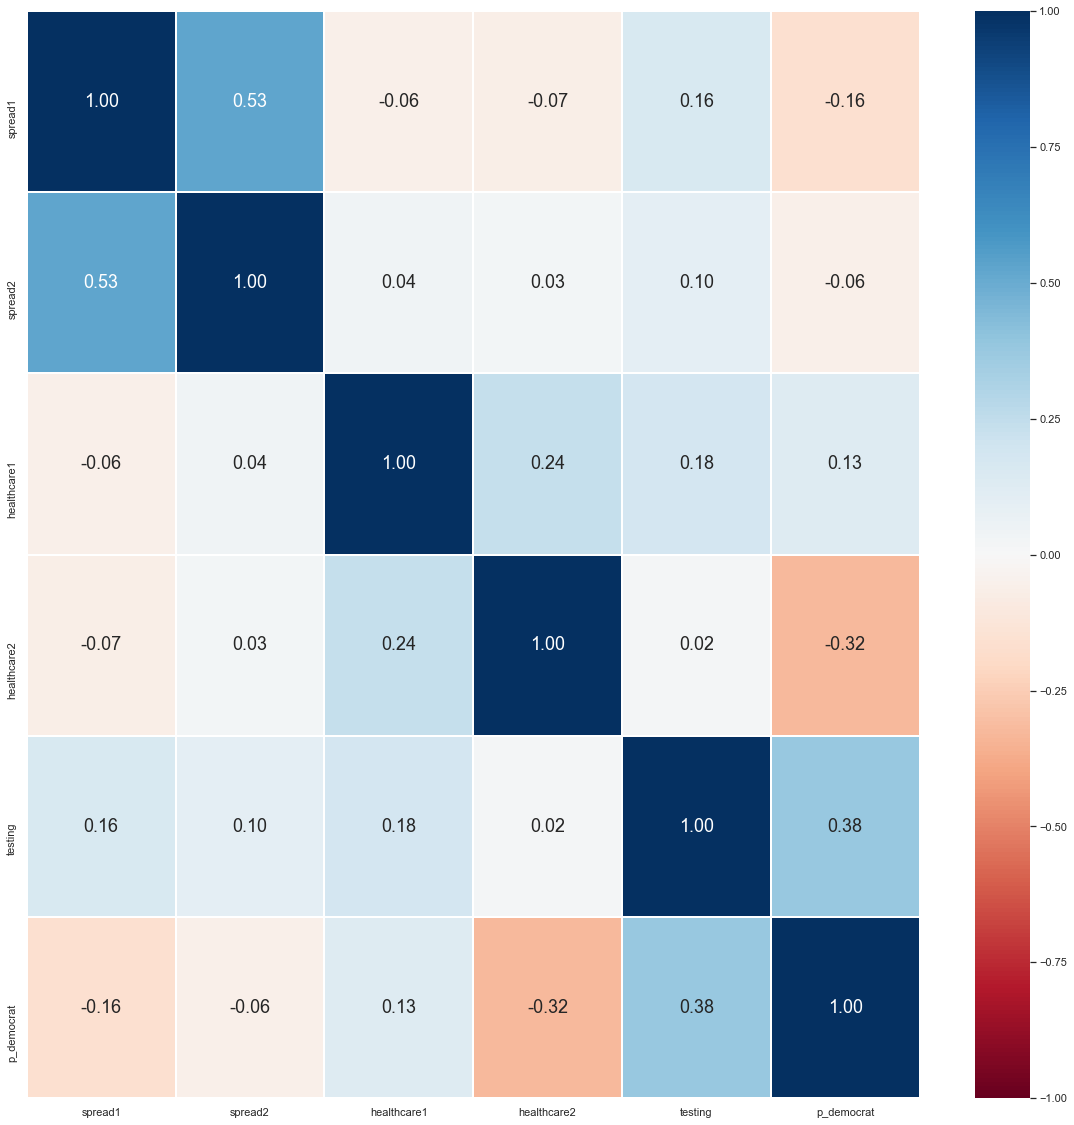

In [21]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

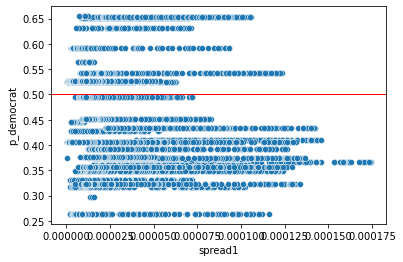

In [13]:
#Plot the percentage of democrats against Spread1
sb.scatterplot(data=new_df, x="spread1", y="p_democrat")
plt.axhline(y=0.5, xmin=0, xmax=1, color = 'r', linewidth = 1)

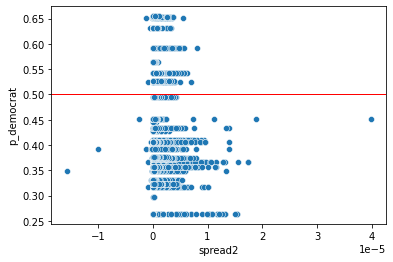

In [14]:
#Plot the percentage of democrats against Spread2
sb.scatterplot(data=new_df, x="spread2", y="p_democrat")
plt.axhline(y=0.5, xmin=0, xmax=1, color = 'r', linewidth = 1)

From the scatterplot, the democratic states (p_democrat > 0.50) tend to have points to the left of the scatterplots for both Spread1 and Spread2, indicating a lower spread percentage. 

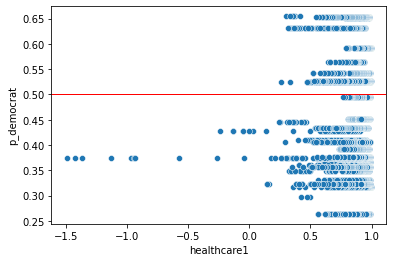

In [15]:
#Plot the percentage of democrats against Healthcare1
sb.scatterplot(data=new_df, x="healthcare1", y="p_democrat")
plt.axhline(y=0.5, xmin=0, xmax=1, color = 'r', linewidth = 1)

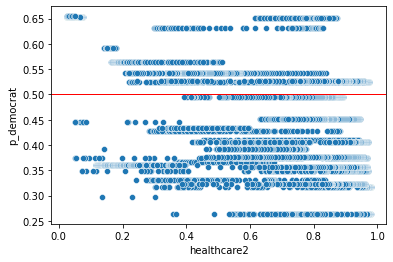

In [16]:
#Plot the percentage of democrats against Healthcare2
sb.scatterplot(data=new_df, x="healthcare2", y="p_democrat")
plt.axhline(y=0.5, xmin=0, xmax=1, color = 'r', linewidth = 1)

From the scatterplot, while it is not possible to visibly infer anything from the graph of percentage of democrats against healthcare2, the democratic states (p_democrat > 0.50) tend to have more points to the right of the scatterplot for the graph of p_democrat against healthcare1, indicating greater and better heathcare services available.

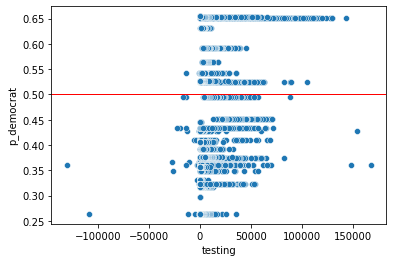

In [17]:
#Plot the percentage of democrats against Testing
sb.scatterplot(data=new_df, x="testing", y="p_democrat")
plt.axhline(y=0.5, xmin=0, xmax=1, color = 'r', linewidth = 1)

While there is no clear trend between the percentage of democrats of a state and the amount of Covid-19 Testing done across all states, it is interesting to note that the state with the highest percentage of democrats at the top of the scatter plot has the highest amount of Covid-19 testings being conducted.

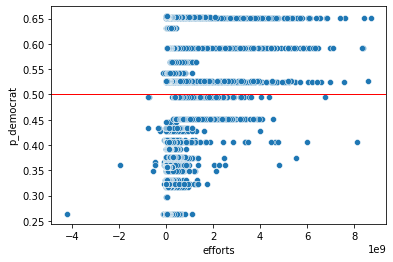

In [18]:
#Plot the percentage of democrats against Efforts
sb.scatterplot(data=new_df, x="efforts", y="p_democrat")
plt.axhline(y=0.5, xmin=0, xmax=1, color = 'r', linewidth = 1)

By combining a states relative spread, healthcare and testings figures to determine the overall efforts of a state government in handling the Covid-19 situation, it is clear that democratic states (p_democrat > 0.5) enjoy a much higher score in the efforts scale as compared to republican states (p_democrat < 0.5). 

### Machine Learning


#### Using a Random Forest Classifier
> When building a decision tree, at each node use some randomness in selecting the attribute to split on, say by randomly selecting an attribute or by selecting an attribute from a random subset

In [19]:
#split variables into x and y 

x = new_df[['spread1', 'spread2', 'healthcare1', 'healthcare2', 'testing']]
y = new_df[['is_democrat']]

In [20]:
#split dataset into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Train Set :", x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (6123, 5) (6123, 1)
Test Set  : (1531, 5) (1531, 1)


In [21]:
#import random forest classifier

from sklearn.ensemble import RandomForestClassifier
rfclass = RandomForestClassifier(random_state = 0, n_estimators = 50, max_depth = 10)
rfclass = rfclass.fit(x_train, np.ravel(y_train,order='C'))

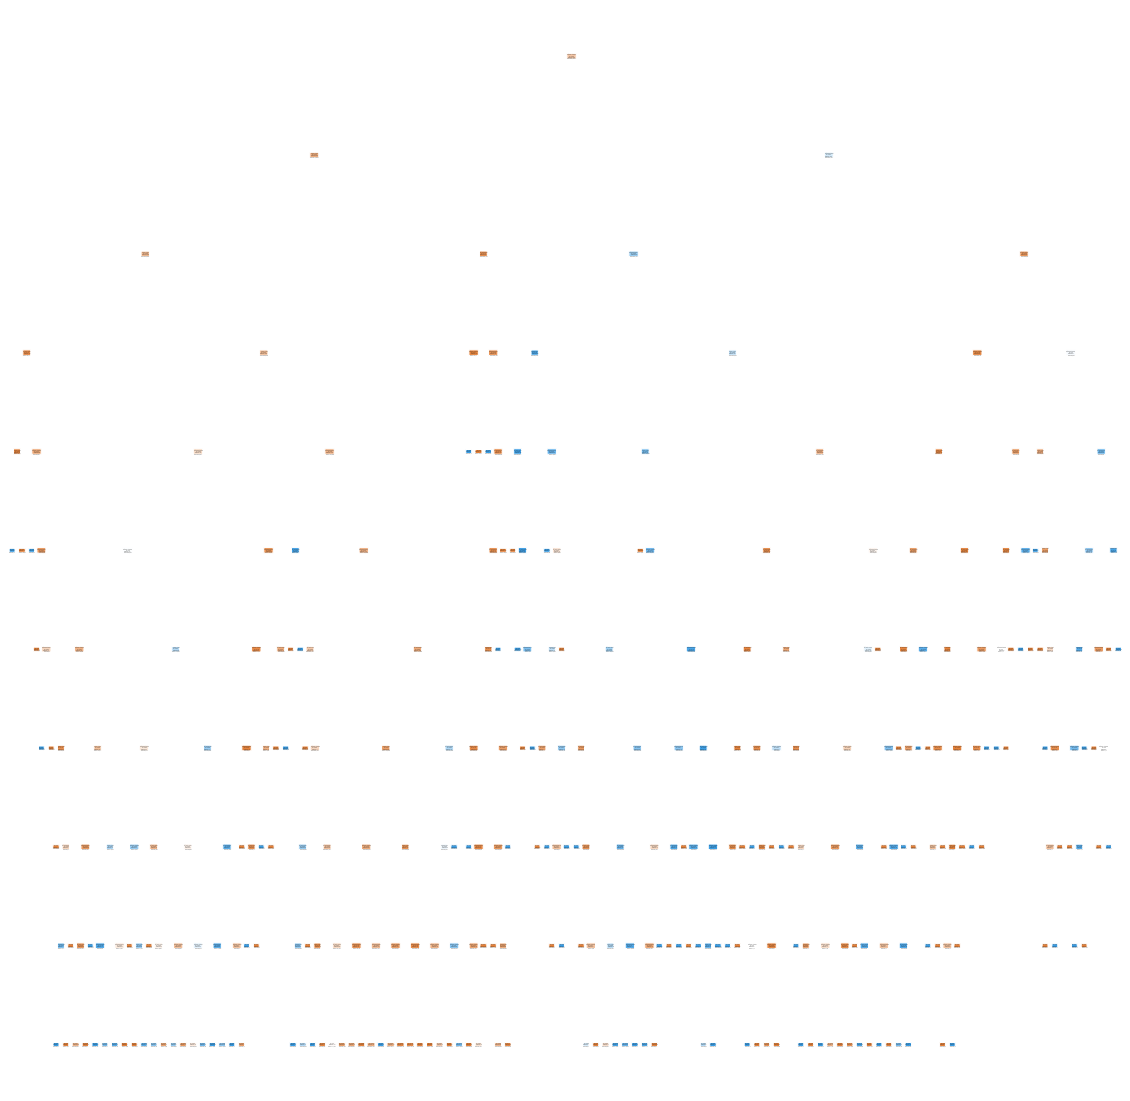

In [22]:
# visualise a single tree from the random forest

from sklearn import tree

sb.set_style('dark')
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,20))
treeplot = tree.plot_tree(rfclass.estimators_[0], feature_names=x.columns, rounded = True, filled = True)

##### As can be seen, due to the max_depth of the tree being set as 10, the visualisation of the tree does not show much as it is much too small. Hence, to get an idea of what is in a tree in the random forest, we decrease the max_depth to 3 just for visualisation purposes.

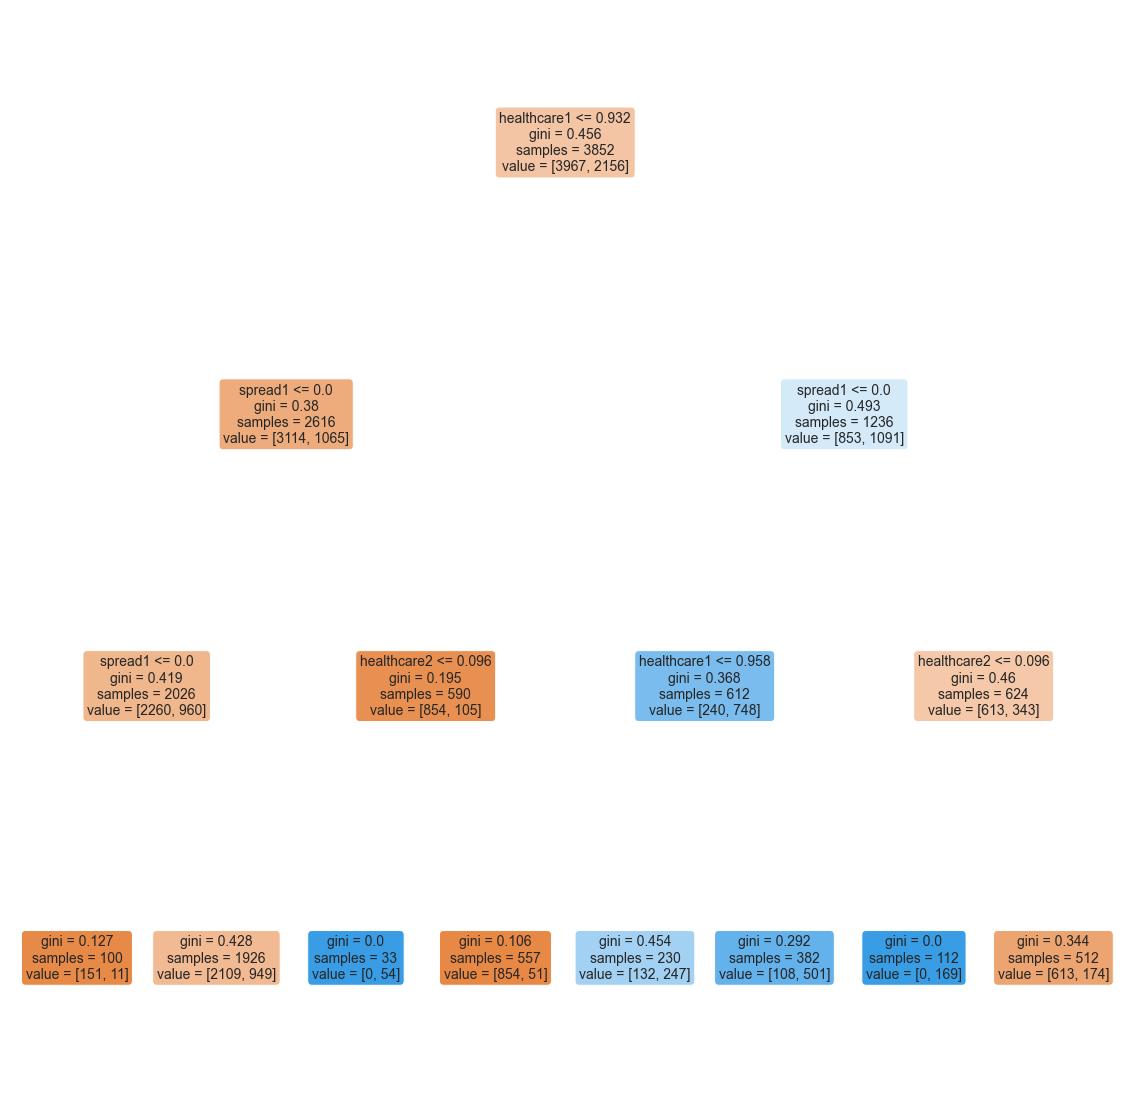

In [23]:
rfclassvis = RandomForestClassifier(random_state = 0, n_estimators = 50, max_depth = 3)
rfclassvis = rfclassvis.fit(x_train, np.ravel(y_train,order='C'))
plt.figure(figsize=(20,20))
treeplot = tree.plot_tree(rfclassvis.estimators_[0], feature_names=x.columns, rounded = True, filled = True)

### Prediction on Train Data and Goodness of Fit
#### Check how good the predictions are on the Train Set
> Metrics : Classification Accuracy and Confusion Matrix

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix:

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Train Data

Train Accuracy : 0.9444716642168871

TPR Train : 0.8498387839705205
TNR Train : 0.9964574898785425

FPR Train : 0.00354251012145749
FNR Train : 0.15016121602947952


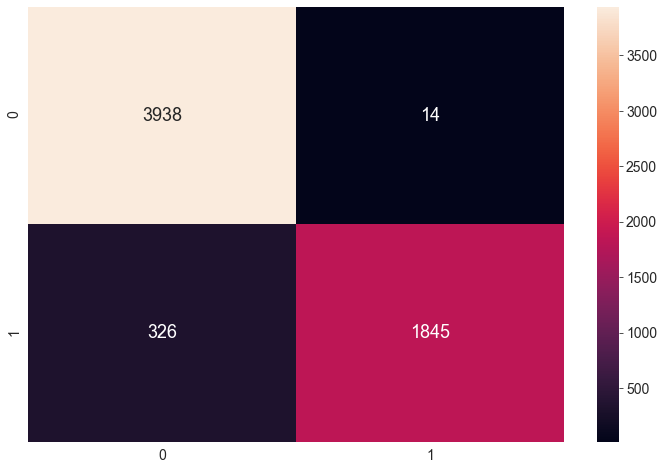

In [24]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix, classification_report

# Predict the Response corresponding to Predictors
y_train_pred = rfclass.predict(x_train)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Train Data\n")
print("Train Accuracy :", rfclass.score(x_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :", (fnTrain/(tpTrain + fnTrain)))

### Prediction on Test Data and Goodness of Fit
#### Check how good the predictions are on the Test Set
> Metrics : Classification Accuracy and Confusion Matrix

Print the Classification Accuracy and all other Accuracy Measures from the Confusion Matrix:  

| Confusion Matrix  |       |        |        |      
| :---              | :---: | :----: | :----: |         
| Actual Negative   |  (0)  |   TN   |   FP   |             
| Actual Positive   |  (1)  |   FN   |   TP   |       
|                   |       |   (0)   |   (1)   |       
|                   |       | Predicted Negative    |   Predicted Postitive  |     


* `TPR = TP / (TP + FN)` : True Positive Rate = True Positives / All Positives    
* `TNR = TN / (TN + FP)` : True Negative Rate = True Negatives / All Negatives    

* `FPR = FP / (TN + FP)` : False Positive Rate = False Positives / All Negatives 
* `FNR = FN / (TP + FN)` : False Negative Rate = False Negatives / All Positives 

Test Data

Test Accuracy : 0.9065969954278249

TPR Test : 0.7831775700934579
TNR Test : 0.9728915662650602

FPR Test : 0.02710843373493976
FNR Test : 0.21682242990654205


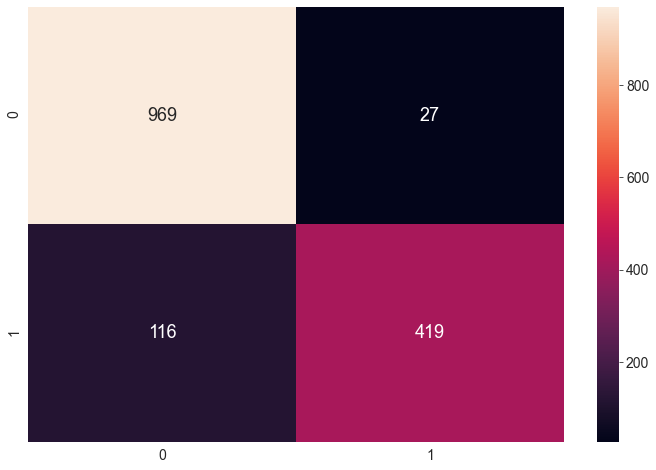

In [25]:
# Predict the Response corresponding to Predictors
y_test_pred = rfclass.predict(x_test)

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Print the Classification Accuracy
print("Test Data\n")
print("Test Accuracy :", rfclass.score(x_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :", (tpTest/(tpTest + fnTest)))
print("TNR Test :", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :", (fpTest/(fpTest + tnTest)))
print("FNR Test :", (fnTest/(fnTest + tpTest)))

### Conclusions

In [26]:
# x = new_df[['spread1', 'spread2', 'healthcare1', 'healthcare2', 'testing']]
array = rfclass.feature_importances_
print("Feature Importance:\n")
print("Spread1: ", array[0])
print("Spread2: ", array[1])
print("Healthcare1: ", array[2])
print("Healthcare2: ", array[3])
print("Testing: ", array[4])

Feature Importance:

Spread1:  0.2441140180294301
Spread2:  0.03471240840616615
Healthcare1:  0.22482492114151328
Healthcare2:  0.28149096570839904
Testing:  0.21485768671449146


##### Healthcare2, which is the fraction of patients tested positive who have since recovered, appears to be the strongest predictor for the random forest classifier to decide whether a state is Democratic or Republican.

### Save model to local file

In [31]:
import joblib
import time
t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H_%M', t)
joblib.dump(rfclass, f"rf_model_{timestamp}.joblib")

['rf_model_Apr-20-2021_16_32.joblib']